**Import Libraries**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**1.2.1** Read the data file " salaries.csv" into a dataframe called "salaries".

In [2]:
salaries = pd.read_csv("salaries.csv")

**1.2.2** Summarize the dataset

In [3]:
salaries

,Name,Age,Salary
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
salaries.shape

(22, 3)

In [5]:
salaries.describe()

,Age,Salary
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [6]:
salaries.dtypes

Name      object
Age        int64
Salary     int64
dtype: object

**1.2.3** Pre-process the data

In [7]:
salaries.head()

,Name,Age,Salary
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [8]:
salaries.drop(['Name'], axis=1, inplace=True);
salaries.head()

,Age,Salary
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [9]:
scaler = MinMaxScaler()

scaler.fit(salaries[['Salary']])
salaries['Salary'] = scaler.transform(salaries[['Salary']])

scaler.fit(salaries[['Age']])
salaries['Age'] = scaler.transform(salaries[['Age']])

salaries.head()

,Age,Salary
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


**1.2.4** Visualise the data

Text(0, 0.5, 'Salary')

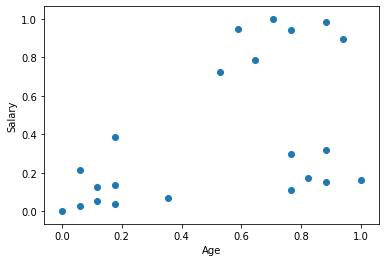

In [10]:
plt.scatter(salaries['Age'],salaries['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

**1.2.5** Use k-Means clustering

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(salaries)
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [13]:
salaries['cluster']=y_predicted
salaries

,Age,Salary,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


**1.2.6** Re-create the earlier scatter plots

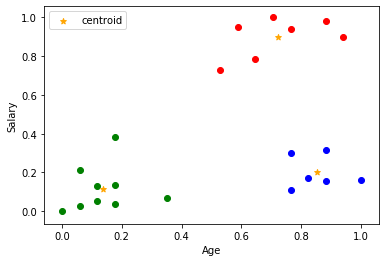

In [14]:
df1 = salaries[salaries.cluster==0]
df2 = salaries[salaries.cluster==1]
df3 = salaries[salaries.cluster==2]
plt.scatter(df1['Age'],df1['Salary'],color='green')
plt.scatter(df2['Age'],df2['Salary'],color='red')
plt.scatter(df3['Age'],df3['Salary'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

**1.2.7** Determine the best value for k

In [15]:
sse = []

k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(salaries[['Age','Salary']])
    sse.append(km.inertia_)

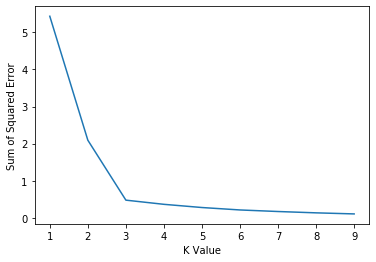

In [16]:
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

According to the elbow curve the best value for K is 3, because after K=3 the SSE doesn't decrease by much.

In [17]:
import sklearn.metrics

score = []

k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit_predict(salaries[['Age','Salary']])
    score.append(sklearn.metrics.silhouette_score(salaries[['Age','Salary']], y_predicted, metric='euclidean'));

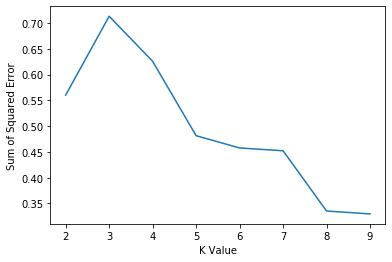

In [18]:
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,score)

According to the Silhouette Score the best value for K is aslo 3, because it produces the highest Silhouette Score.